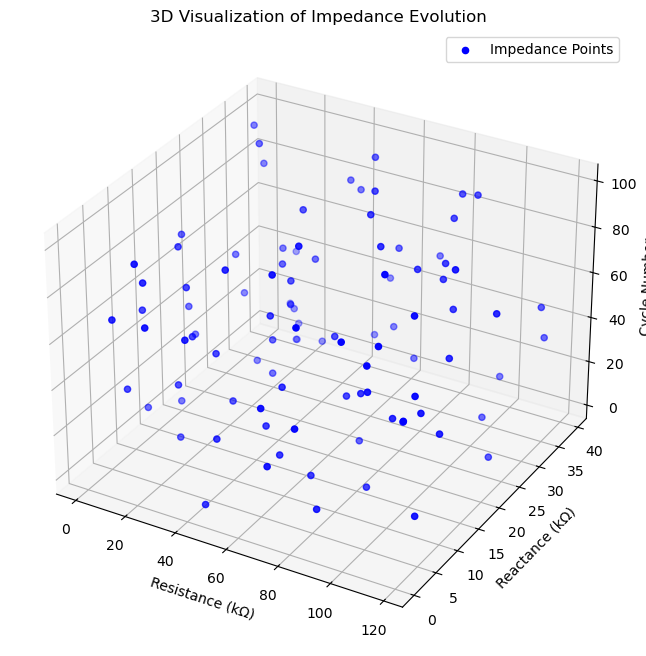

In [25]:
# Task A: 3D Plot of Impedance Measurements

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data for 100 charge-discharge cycles
cycles = np.arange(1, 101)
resistance_values = np.random.uniform(0, 120, size=100)  # Real part of impedance (kΩ)
reactance_values = np.random.uniform(0, 40, size=100)    # Imaginary part of impedance (kΩ)

# Assemble data into a DataFrame
impedance_data = pd.DataFrame({
    "Cycle": cycles,
    "Resistance_kOhm": resistance_values,
    "Reactance_kOhm": reactance_values
})

# Create 3D scatter plot
fig = plt.figure(figsize=(10, 8))
axis = fig.add_subplot(111, projection='3d')
axis.scatter(
    impedance_data["Resistance_kOhm"],
    impedance_data["Reactance_kOhm"],
    impedance_data["Cycle"],
    color='blue',
    label='Impedance Points'
)
axis.set_xlabel("Resistance (kΩ)")
axis.set_ylabel("Reactance (kΩ)")
axis.set_zlabel("Cycle Number")
axis.set_title("3D plot of Impedance Evolution")
axis.legend()
plt.show()


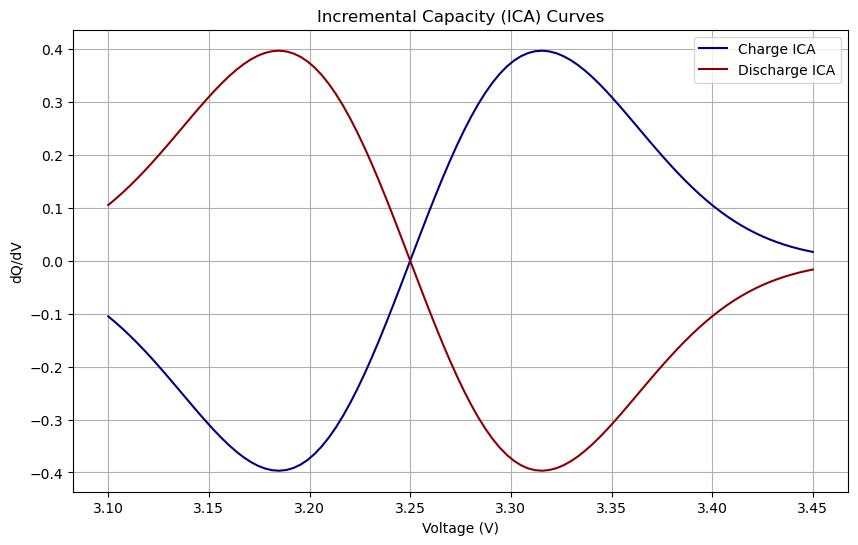

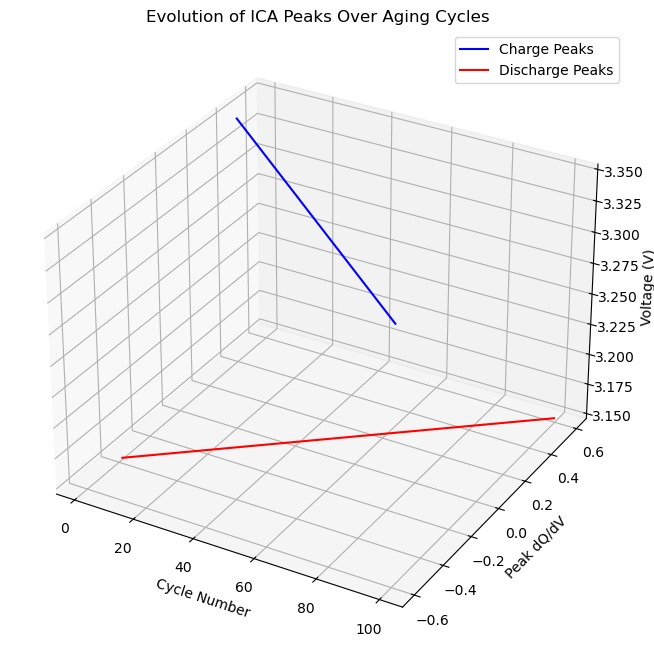

In [26]:
# Task B: Incremental Capacity Analysis

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate voltage range and simulate dQ/dV profiles for charge and discharge
voltage_vals = np.linspace(3.1, 3.45, 100)
ica_charge = np.sin(10 * (voltage_vals - 3.25)) * np.exp(-((voltage_vals - 3.25)**2) / 0.01)
ica_discharge = -ica_charge  # Inverted signal for discharge

# Plot ICA curves
plt.figure(figsize=(10, 6))
plt.plot(voltage_vals, ica_charge, label="Charge ICA", color='navy')
plt.plot(voltage_vals, ica_discharge, label="Discharge ICA", color='darkred')
plt.xlabel("Voltage (V)")
plt.ylabel("dQ/dV")
plt.title("Incremental Capacity (ICA) Curves")
plt.grid(True)
plt.legend()
plt.show()

# Simulate aging effect: ICA peak changes over 100 cycles
cycles = np.arange(1, 101)
peak_charge_vals = [np.max(ica_charge) - 0.01 * i for i in range(100)]
peak_discharge_vals = [np.min(ica_discharge) + 0.01 * i for i in range(100)]

# 3D line plot to show peak evolution over cycles
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(cycles, peak_charge_vals, zs=3.35, zdir='z', label="Charge Peaks", color='blue')
ax.plot(cycles, peak_discharge_vals, zs=3.15, zdir='z', label="Discharge Peaks", color='red')
ax.set_xlabel("Cycle Number")
ax.set_ylabel("Peak dQ/dV")
ax.set_zlabel("Voltage (V)")
ax.set_title("Evolution of ICA Peaks Over Aging Cycles")
ax.legend()
plt.show()


C:\Users\singh\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\singh\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\singh\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\singh\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\singh\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


   Index                                             Inputs    Actual  \
0      0  {'Cycle': 84.0, 'Real_Impedance': 7.6270020343...  0.063558   
1      1  {'Cycle': 54.0, 'Real_Impedance': 107.37928205...  0.894827   
2      2  {'Cycle': 71.0, 'Real_Impedance': 92.669372315...  0.772245   
3      3  {'Cycle': 46.0, 'Real_Impedance': 79.502674122...  0.662522   
4      4  {'Cycle': 45.0, 'Real_Impedance': 31.053597792...  0.258780   

   Predicted     Error  
0   0.056985  0.006573  
1   0.899861 -0.005033  
2   0.774791 -0.002546  
3   0.666140 -0.003618  
4   0.281514 -0.022734  


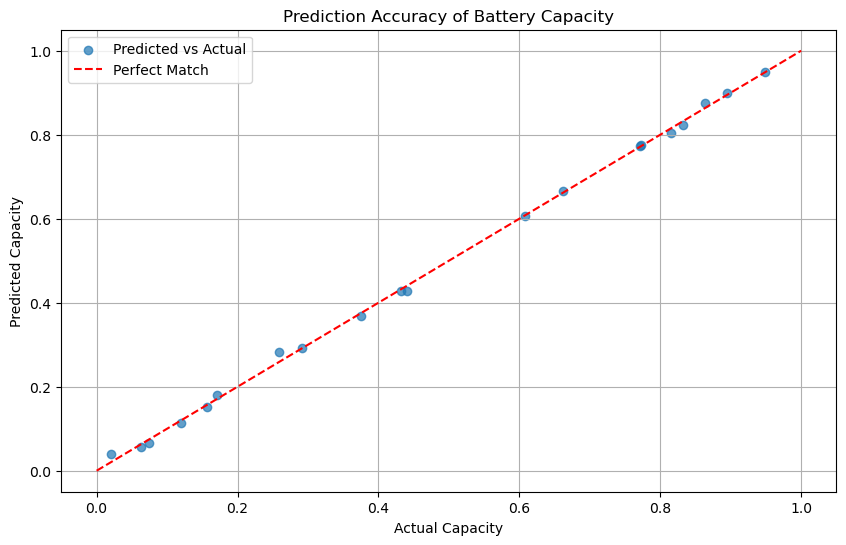

Model Performance Summary:
RMSE: 0.0093
MAE : 0.0073


In [27]:
# Task C :  Estimating Battery Capacity Using ML

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Set random seed and generate synthetic capacity values
np.random.seed(42)
capacity_vals = np.random.uniform(0, 1, size=100)

# Create dataset with impedance and cycle data
data = pd.DataFrame({
    "Cycle": cycle_count,
    "Real_Impedance": real_impedance,
    "Imag_Impedance": imag_impedance,
    "Capacity": capacity_vals
})

# Define input features and target variable
features = data[["Cycle", "Real_Impedance", "Imag_Impedance"]]
target = data["Capacity"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize and train the model
regressor = RandomForestRegressor(random_state=42)
regressor.fit(X_train, y_train)

# Predict and store sample outputs
sample_predictions = []
for i in range(min(5, len(X_test))):
    input_data = X_test.iloc[i].values.reshape(1, -1)
    true_val = y_test.iloc[i]
    pred_val = regressor.predict(input_data)[0]
    sample_predictions.append({
        "Index": i,
        "Inputs": X_test.iloc[i].to_dict(),
        "Actual": true_val,
        "Predicted": pred_val,
        "Error": true_val - pred_val
    })

# Display results
results_df = pd.DataFrame(sample_predictions)
print(results_df)

# Evaluate model on the full test set
all_predictions = regressor.predict(X_test)

# Visualization of prediction performance
plt.figure(figsize=(10, 6))
plt.scatter(y_test, all_predictions, alpha=0.7, label="Predicted vs Actual")
plt.plot([0, 1], [0, 1], 'r--', label="Perfect Match")
plt.xlabel("Actual Capacity")
plt.ylabel("Predicted Capacity")
plt.title("Prediction Accuracy of Battery Capacity")
plt.legend()
plt.grid(True)
plt.show()

# Performance metrics
rmse_val = np.sqrt(mean_squared_error(y_test, all_predictions))
mae_val = mean_absolute_error(y_test, all_predictions)
print("Model Performance Summary:")
print(f"RMSE: {rmse_val:.4f}")
print(f"MAE : {mae_val:.4f}")
